### K-means

K-means clustering is one of the simplest and popular unsupervised machine learning techniques for clustering datas.

Assuming we have the input data points $x_1,x_2,x_3,…,x_n$ and value the number of clusters K.
We follow the below steps:

i)We choose K points as our initial centroids from the input datas, or we can choose randomly or the first K.

ii)Then, we find the Euclidean distance between each point in the dataset and the identified K points (cluster centroids).

iii)After that, we assign each data point to the closest centroid using the distance that we found in step ii).

iv)We continue by finding the new centroid by taking the average of the points in each cluster group.

v)Finally, we repeat the proccess of steps 2 to 4 for a fixed number of iteration or until the centroids will remain the same.



Euclidean Distance between two points in space:
d(p,q) = $ \sqrt{(q_1 - p_1)^2 + (q_2 -p_2)^2} $

Assigning each point to the nearest cluster:
If each cluster centroid is denoted by $c_i$, then each data point x is assigned to a cluster based on 

arg min dist$(c_i,x)^2 c_i \in C$ where dist() is the euclidean distance

Finding the new centroid from the clustered group of points: $ c_i = \frac{1}{|S_i|} \sum_{x_i \in S_i}^{} x_i $


$S_i$ is the set of all points assigned to the ith cluster.

### Agglomerative Hierarchical Clustering

There are two main categories of clustering: Hierarchical, Partitional

Differencies between hierarchical and
partitional clustering:
– Partitional Clustering
A division of data objects into non-overlapping subsets (clusters)
– Hierarchical clustering
A set of nested clusters organized as a hierarchical tree



Two main types of hierarchical clustering
Agglomerative:
Starts by assuming each data point as individual clusters. 
At each step, we merge the closest pair of clusters with the help of the distance matrix until only one cluster
(or k clusters) left

Divisive: 
Start with one, that includes all data points
At each step, we split a cluster until each cluster contains an individual
point (or there are k clusters)

Hierarchical clustering algorithms use a similarity or distance matrix

In this algorithm, we start by considering each data point as a subcluster. We set a metric to measure the distance between all pairs of subclusters at each step and keep merging the nearest two subclusters in each step. We repeat this process until there is only one cluster remaining in the system.

Steps of Agglomerative Clustering:

i).We assign each data point as a single cluster

ii) We define what distance measure we are going to use(e.g euclidean distance) and after that we calculate the distance matrix.

iii) Determine the linkage measurements to merge the clusters.

iv) Update the distance matrix.

v) We repeat the same process until every data point become one cluster.

Linkage measurements:

Single Linkage : Distance between closest elements in clusters, 
$D(c_1,c_2) = min D(x_1,x_2)$, where $x_1 \in c_1, x_2 \in c_2$

Complete Linkage: Distance between farthest elements in clusters,
$D(c_1,c_2) = max D(x_1,x_2)$, where $x_1 \in c_1, x_2 \in c_2$

Average Linkage: Average of all pairwise distances,
$D(c_1,c_2) = \frac{1}{c_1} \frac{1}{c_2} \sum_{x_1 \in c_1}{} \sum_{x_2 \in c_2}{D(x_1,x_2)}$ 

Centroids: Distance between centroids (means) of two clusters,
$D(c_1,c_2) = D(( \frac{1}{c_1} \sum_{x \in c_1}{} \overrightarrow{x} ), (\frac{1}{c_2} \sum_{x \in c_2}{} \overrightarrow{x} ))$

### DBSCAN

DBSCAN is a short-form of Density-Based Spatial Clustering of Applications with Noise. It is an unsupervised machine learnning algorithm that takes a set of points and makes them into some sets which have the same properties. It is based on the density-based clustering and it will find the outliers also which don't lie in any of the cluster or set.

Steps of DBSCAN:

i) We start with an random starting point that has not been visited.

ii) Extract the neighborhood of this point using ε (All points which are within the ε distance are neighborhood).

iii) If there are sufficient neighborhoods around this point then the clustering process starts and the point is marked as visited else this point is labeled as noise (Later this point can become the part of the cluster).

iv) If a point is found to be a part of the cluster then its ε neighborhood is also the part of the cluster and the above procedure from step 2 is repeated for all ε neighborhood points. This is repeated until all points in the cluster is determined.

v) A new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise.

vi) This process continues until all points are marked as visited.

DBSCAN is based on two parameters Epsilon and Minimum number of neighbors(MinPts):

Epsilon:

It is used as radius to draw a circle which we assume as a cluster.

Minimum number of neighbours(MinPts):
Minimum number of data point should contain within epsilon radius.

DBSCAN contains following types of data point:

i)Core point:
Core point is a data point which have specified number of minimum number of neighbours(MinPts) within epsilon radius

ii)Border point:
Border point is data point that have neighbours less than minimum number of neighbours (MinPts), but it's in neighbourhood of core data point

iii)Outlier point:
Outlier point is a data point which is neither a border point nor core point.

### Comparing K-means, Agglomerative Hierarchical Clustering and DBSCAN with coding example 

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data = pd.read_csv("Mall_Customers.csv")
#Our goal is to separate customers in groups in order to cluster them by taking into account
#their spending score and their annual salary.
#As the number of spending score and the annual income increase, 
#we ensure greater probabilities for selling products.

data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(data.shape)
data.isnull().sum()

(200, 5)


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
data.replace({'Genre':{'Male':0,'Female':1}}, inplace=True)
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


### We will use only the two last columns : Annual Income and Spending Score(1-100)

In [5]:
data_for_clustering = data.iloc[:,3:5]
data_for_clustering

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Silhouette Score: 0.297 for i =  2
Silhouette Score: 0.468 for i =  3
Silhouette Score: 0.493 for i =  4
Silhouette Score: 0.554 for i =  5
Silhouette Score: 0.540 for i =  6
Silhouette Score: 0.526 for i =  7
Silhouette Score: 0.458 for i =  8
Silhouette Score: 0.457 for i =  9
Silhouette Score: 0.459 for i =  10
Silhouette Score: 0.438 for i =  11
Silhouette Score: 0.436 for i =  12
Silhouette Score: 0.412 for i =  13
Silhouette Score: 0.420 for i =  14
Silhouette Score: 0.425 for i =  15
Silhouette Score: 0.415 for i =  16
Silhouette Score: 0.426 for i =  17
Silhouette Score: 0.424 for i =  18
Silhouette Score: 0.411 for i =  19


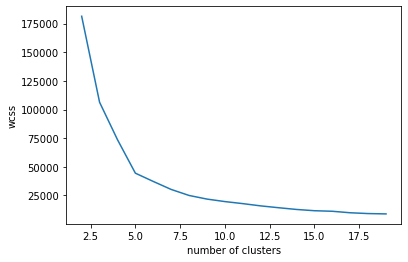

In [6]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
array_save = []
#We will apply k-means for Number of cluster = [2,20]
for i in range(2,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter=1000, random_state = 42,algorithm='elkan')
    kmeans.fit(data_for_clustering)
    array_save.append(kmeans.inertia_)
    score = silhouette_score(data_for_clustering, kmeans.labels_, metric='euclidean')
    print('Silhouette Score: %.3f' % score +" for i = " ,i )

    
plt.plot(range(2,20), array_save)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()  

##K-Means: Inertia
#Inertia measures how well a dataset was clustered by K-Means.
#It is calculated by measuring the distance between each data point and its centroid, 
#squaring this distance, and summing these squares across one cluster.

The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. In this example the Elbow plot above suggests that `5` is the optimal number of clusters. 

The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate.
Silhouette score, S, for each sample is calculated using the following formula:

\(S = \frac{(b - a)}{max(a, b)}\)

The value of the Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

We conclude that the maximum silhouette scores is achieved by using number of neighbors K = 5

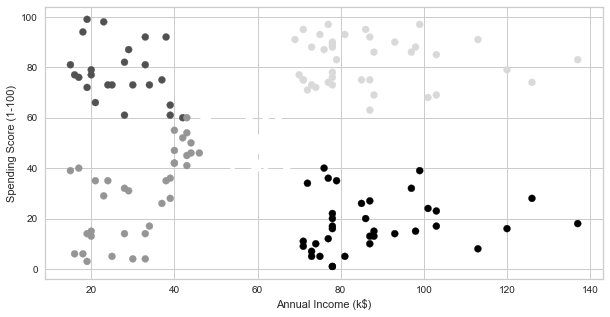

In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
km.fit(data)
plt.figure(figsize=(10,5))
plt.scatter(x= data_for_clustering["Annual Income (k$)"], y=data_for_clustering["Spending Score (1-100)"], c= km.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)');

In [12]:
y_predicted = km.fit_predict(data_for_clustering)
data_for_clustering["Cluster"] = y_predicted
data_for_clustering.head(10)

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,0
1,15,81,1
2,16,6,0
3,16,77,1
4,17,40,0
5,17,76,1
6,18,6,0
7,18,94,1
8,19,3,0
9,19,72,1


In [13]:
km.cluster_centers_

array([[ 2.63043478e+01,  2.09130435e+01, -4.44089210e-16],
       [ 2.57272727e+01,  7.93636364e+01,  3.00000000e+00],
       [ 8.65384615e+01,  8.21282051e+01,  2.00000000e+00],
       [ 8.82000000e+01,  1.71142857e+01,  4.00000000e+00],
       [ 5.52962963e+01,  4.95185185e+01,  1.00000000e+00]])

In [28]:
score = silhouette_score(data_for_clustering, km.labels_, metric='euclidean')
score

0.5553398072116895

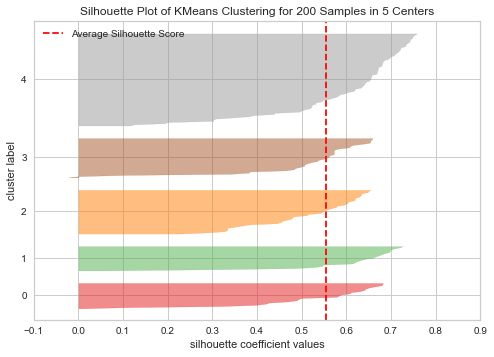

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:

from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(km)

visualizer.fit(data_for_clustering) 
visualizer.show()  

### Agglomerative Hierarchical Clustering

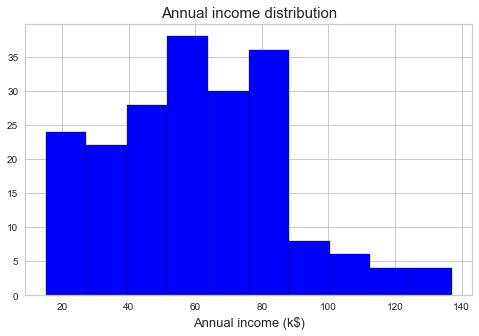

In [15]:
plt.figure(figsize=(8,5))
plt.title("Annual income distribution",fontsize=15)
plt.xlabel ("Annual income (k$)",fontsize=13)
plt.grid(True)
plt.hist(data_for_clustering['Annual Income (k$)'],color='blue',edgecolor='k')
plt.show()

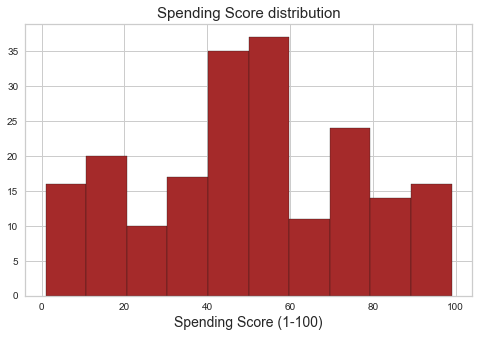

In [16]:
plt.figure(figsize=(8,5))
plt.title("Spending Score distribution",fontsize=15)
plt.xlabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.hist(data_for_clustering['Spending Score (1-100)'],color='brown',edgecolor='k')
plt.show()

Dendrograms:

Dendrograms are tree diagrams that are used to illustrate the arrangement of the clusters produced by hierarchical clustering. 
A subset of similiar data is created in a tree like structure in which the root node corresponds to entire data and branches are created from the root node to form several clusters. The optimal number of clusters is equal to the number of vertical lines going through the horizontal line.

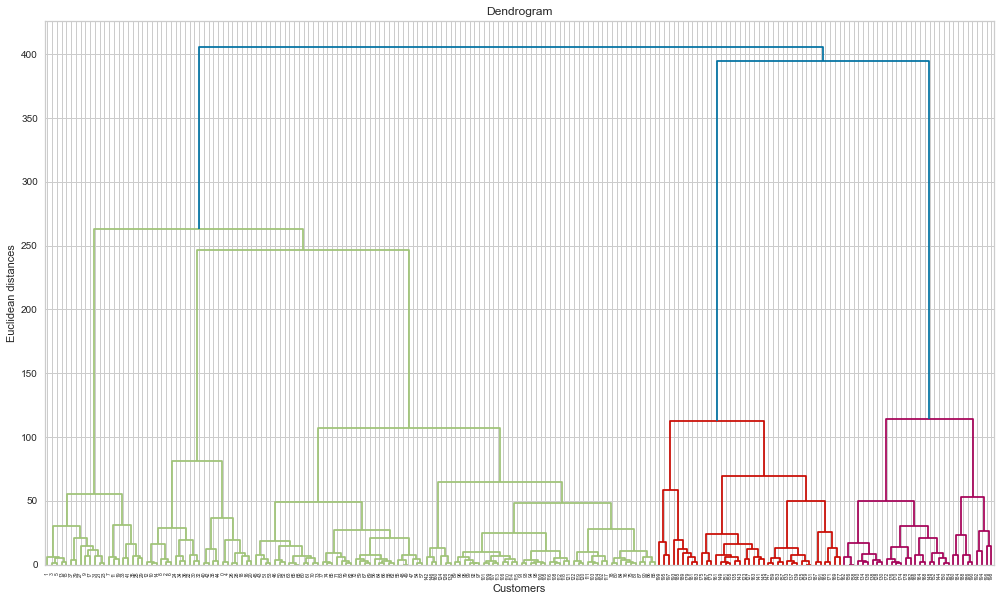

In [17]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
plt.figure(figsize=(17,10))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(data_for_clustering, method = 'ward'))
plt.show()

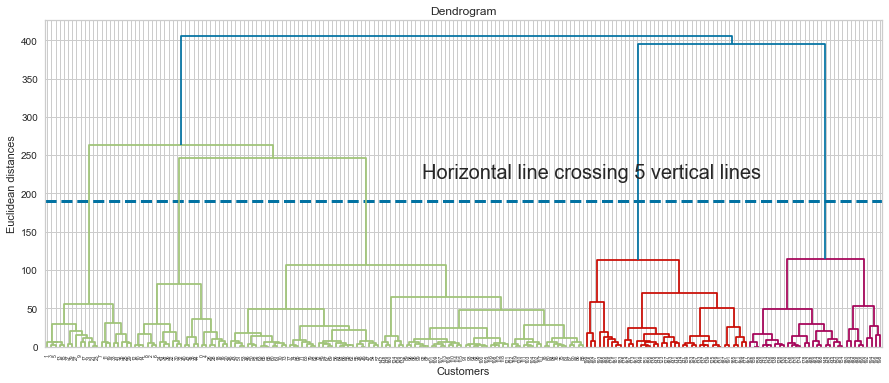

In [18]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.hlines(y=190,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=900,y=220,s='Horizontal line crossing 5 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(data_for_clustering, method = 'ward'))
plt.show()

We can clearly visualize the steps of hierarchical clustering. More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
And then, we can set a threshold distance and draw a horizontal line. We try to set the threshold in such a way that it cuts the tallest vertical line. From that dendrogram above we can set the threshold as = 200 and we can see from the output below : the horizontal line crossing 5 vertical lines.
So the optimal numer of clusters equals to 5.


In [19]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_for_clustering)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

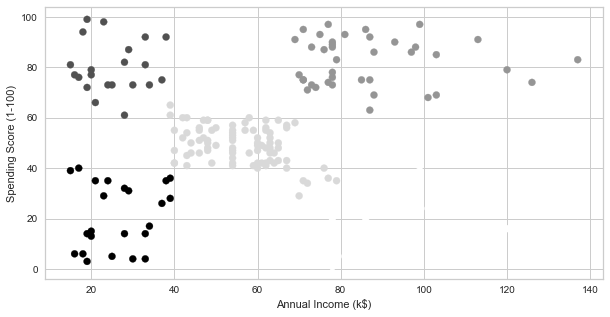

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(x= data_for_clustering["Annual Income (k$)"], y=data_for_clustering["Spending Score (1-100)"], c= y_hc)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)');

In [26]:
score = silhouette_score(data_for_clustering, hc.labels_, metric='euclidean')
score

0.5542164886093149

We conclude that our target group is the group with the upper grey points.

### DBSCAN

In [21]:
from sklearn.cluster import DBSCAN
from collections import Counter
# Compute DBSCAN
db = DBSCAN(eps=9, min_samples=4,metric = "euclidean")
db.fit(data_for_clustering)

outliers_df = data_for_clustering[db.labels_==-1]
clusters_df = data_for_clustering[db.labels_ !=-1]
        
colors = db.labels_
colors_clusters = colors [colors!= -1]
color_outliers = 'blue'

clusters = Counter(db.labels_)
print(clusters)
print(data_for_clustering[db.labels_ == -1].head())
print('Number of clusters = {}'.format(len(clusters)-1))                                                                                                

Counter({3: 89, 4: 32, 5: 23, 0: 17, -1: 16, 1: 12, 2: 7, 6: 4})
     Annual Income (k$)  Spending Score (1-100)  Cluster
7                    18                      94        1
11                   19                      99        1
19                   23                      98        1
41                   38                      92        1
184                  99                      39        3
Number of clusters = 7


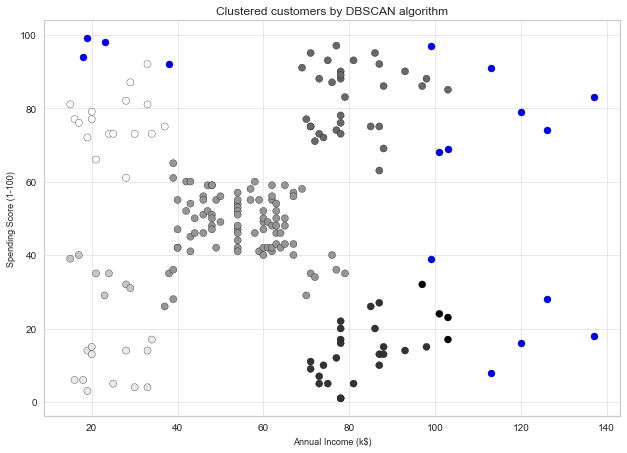

In [22]:
# Plot clusters and outliers
fig=plt.figure ()
ax = fig.add_axes ([.1, .1, 1, 1])
ax.scatter(clusters_df["Annual Income (k$)"], clusters_df["Spending Score (1-100)"],
        c = colors_clusters, edgecolors='black', s=50)
ax.scatter (outliers_df["Annual Income (k$)"], outliers_df["Spending Score (1-100)"],
        c = color_outliers, edgecolors='black', s=50)
ax.set_xlabel ("Annual Income (k$)", family='Arial', fontsize=9)
ax.set_ylabel ("Spending Score (1-100)", family='Arial', fontsize=9)
plt.title('Clustered customers by DBSCAN algorithm', family='Arial', fontsize=12)
plt.grid (which='major', color='#cccccc', alpha=0.45)
plt.show ()


From this part of DBSCAN implementation, we can conclude if DBSCAN performed really good at detecting outliers which would not be easy with K-Means or Hierarchical clustering techniques. If we also apply the DBSCAN to a dataset with arbitrary shaped clusters, we’ll see the success of DBSCAN as well.
We assume that the blue points are the outliers.

In [24]:
score = silhouette_score(data_for_clustering, db.labels_, metric='euclidean')
score

0.42679719644992403

To sum up, we can easy observe that Agglomerative hierarchical clustering and K-means ensure better results due to higher silhouette score.
Agglomerative hierarchical clustering is quite more accurate than K-means.
We assumed that if we apply different values for MinPts and Epsilon in dbscan we might
achieved similar results.